<a href="https://colab.research.google.com/github/TranQuocHuy83/mlops_training---module02---HuyTran-/blob/main/04_inference_and_saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Exercise 4: Inference and Model Saving
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Making predictions in inference mode
- Understanding model.eval() and torch.no_grad()
- Saving model state
- Loading saved models
- Evaluating on test data

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import datetime

# Set random seed for reproducibility
torch.manual_seed(42)

# ============================================
# Part 1: Train a Model (Quick Setup)
# ============================================

In [2]:
print("=" * 60)
print("Part 1: Training a Model")
print("=" * 60)

# TODO: Setup data
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.7 * len(X))
val_split = int(0.85 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]

# TODO: Create and train model


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Quick training
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Model trained!")
print(f"Learned weight: {model.weight.item():.4f} (true: {weight})")
print(f"Learned bias: {model.bias.item():.4f} (true: {bias})")

Part 1: Training a Model
Model trained!
Learned weight: 0.4398 (true: 0.7)
Learned bias: 0.3607 (true: 0.3)


# ============================================
# Part 2: Making Predictions in Inference Mode
# ============================================

In [3]:
print("\n" + "=" * 60)
print("Part 2: Making Predictions")
print("=" * 60)

# TODO: Set model to evaluation mode
model.eval()
print("Model set to evaluation mode")

# TODO: Make predictions on test data
with torch.no_grad():
    test_predictions = model(X_test)

print(f"\nTest predictions (first 5):")
print(f"  X: {X_test[:5].flatten()}")
print(f"  Predicted: {test_predictions[:5].flatten()}")
print(f"  Actual: {y_test[:5].flatten()}")

# TODO: Calculate test loss
test_loss = criterion(test_predictions, y_test)
print(f"\nTest Loss (MSE): {test_loss.item():.4f}")


Part 2: Making Predictions
Model set to evaluation mode

Test predictions (first 5):
  X: tensor([0.8400, 0.8600, 0.8800, 0.9000, 0.9200])
  Predicted: tensor([0.7302, 0.7390, 0.7478, 0.7566, 0.7654])
  Actual: tensor([0.8880, 0.9020, 0.9160, 0.9300, 0.9440])

Test Loss (MSE): 0.0311


# ============================================
# Part 3: Visualizing Predictions
# ============================================


Part 3: Visualizing Predictions


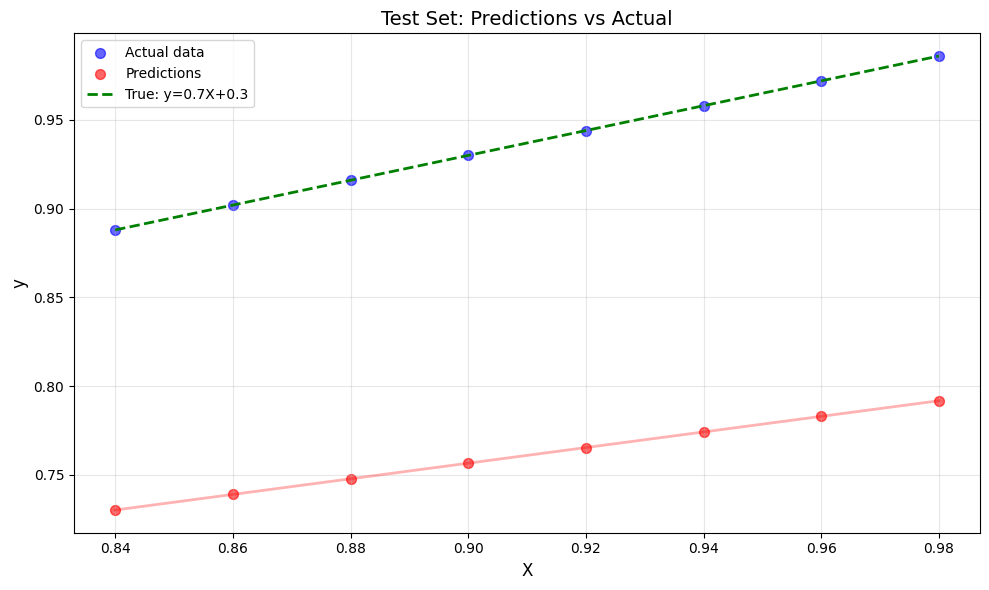

Predictions visualized!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Visualizing Predictions")
print("=" * 60)

# TODO: Plot test predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c='b', s=50, alpha=0.6, label='Actual data')
plt.scatter(X_test, test_predictions, c='r', s=50, alpha=0.6, label='Predictions')
plt.plot(X_test, test_predictions, 'r-', linewidth=2, alpha=0.3)
plt.plot(X_test, weight * X_test + bias, 'g--', linewidth=2, label=f'True: y={weight}X+{bias}')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.title('Test Set: Predictions vs Actual', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Predictions visualized!")

# ============================================
# Part 4: Saving the Model
# ============================================

In [5]:
print("\n" + "=" * 60)
print("Part 4: Saving the Model")
print("=" * 60)

# TODO: Create directory if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# TODO: Save model state dict
model_path = 'saved_models/linear_model.pth'
torch.save(model.state_dict(), model_path)

print(f"Model saved to: {model_path}")

# TODO: Verify file was created
if os.path.exists(model_path):
    file_size = os.path.getsize(model_path)
    print(f"File size: {file_size} bytes")
else:
    print("Error: File was not created!")


Part 4: Saving the Model
Model saved to: saved_models/linear_model.pth
File size: 1933 bytes


# ============================================
# Part 5: Loading the Model
# ============================================

In [6]:
print("\n" + "=" * 60)
print("Part 5: Loading the Model")
print("=" * 60)

# TODO: Create new model instance
loaded_model = LinearRegressionModel()
print("Created new model instance")
print(f"Parameters before loading:")
print(f"  Weight: {loaded_model.weight.item():.4f}")
print(f"  Bias: {loaded_model.bias.item():.4f}")

# TODO: Load saved state
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

print(f"\nParameters after loading:")
print(f"  Weight: {loaded_model.weight.item():.4f}")
print(f"  Bias: {loaded_model.bias.item():.4f}")

# TODO: Verify loaded model works
with torch.no_grad():
    loaded_predictions = loaded_model(X_test)
    verification_loss = criterion(loaded_predictions, y_test)

print(f"\nVerification:")
print(f"  Test Loss: {verification_loss.item():.4f}")
print(f"  Matches original: {torch.allclose(test_predictions, loaded_predictions)}")


Part 5: Loading the Model
Created new model instance
Parameters before loading:
  Weight: 0.2345
  Bias: 0.2303

Parameters after loading:
  Weight: 0.4398
  Bias: 0.3607

Verification:
  Test Loss: 0.0311
  Matches original: True


# ============================================
# Part 6: Saving Complete Checkpoints
# ============================================

In [7]:
print("\n" + "=" * 60)
print("Part 6: Saving Complete Checkpoints")
print("=" * 60)

# TODO: Create checkpoint dictionary
checkpoint = {
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': criterion(model(X_train), y_train).item(),
    'val_loss': criterion(model(X_val), y_val).item(),
    'test_loss': test_loss.item(),
    'hyperparameters': {
        'learning_rate': 0.01,
        'weight': weight,
        'bias': bias
    },
    'timestamp': datetime.datetime.now().isoformat(),
    'pytorch_version': torch.__version__,
}

# TODO: Save checkpoint
# Note: .tar is the PyTorch convention for checkpoints (contains more than just state_dict)
checkpoint_path = 'saved_models/checkpoint.tar'
torch.save(checkpoint, checkpoint_path)

print(f"Checkpoint saved to: {checkpoint_path}")
print(f"Checkpoint contents:")
for key in checkpoint.keys():
    print(f"  {key}")


Part 6: Saving Complete Checkpoints
Checkpoint saved to: saved_models/checkpoint.tar
Checkpoint contents:
  epoch
  model_state_dict
  optimizer_state_dict
  train_loss
  val_loss
  test_loss
  hyperparameters
  timestamp
  pytorch_version


# ============================================
# Part 7: Loading from Checkpoint
# ============================================

In [10]:
print("\n" + "=" * 60)
print("Part 7: Loading from Checkpoint")
print("=" * 60)

# TODO: Load checkpoint
loaded_checkpoint = torch.load(checkpoint_path, weights_only=False)


print(f"Loaded checkpoint from epoch {loaded_checkpoint['epoch']}")
print(f"Train loss: {loaded_checkpoint['train_loss']:.4f}")
print(f"Val loss: {loaded_checkpoint['val_loss']:.4f}")
print(f"Test loss: {loaded_checkpoint['test_loss']:.4f}")
print(f"Hyperparameters: {loaded_checkpoint['hyperparameters']}")

# TODO: Restore model and optimizer
restored_model = LinearRegressionModel()
restored_model.load_state_dict(loaded_checkpoint['model_state_dict'])
restored_model.eval()

restored_optimizer = optim.SGD(restored_model.parameters(), lr=0.01)
restored_optimizer.load_state_dict(loaded_checkpoint['optimizer_state_dict'])

print("\nModel and optimizer restored successfully!")


Part 7: Loading from Checkpoint
Loaded checkpoint from epoch 100
Train loss: 0.0035
Val loss: 0.0189
Test loss: 0.0311
Hyperparameters: {'learning_rate': 0.01, 'weight': 0.7, 'bias': 0.3}

Model and optimizer restored successfully!


# ============================================
# Exercises
# ============================================

In [11]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)

# Exercise 1: Multiple model versions
print("\nExercise 1: Save multiple model versions")
# TODO: Train models with different learning rates
learning_rates = [0.001, 0.01, 0.1]
epochs = 100

for lr in learning_rates:
    print(f"\nTraining model with lr={lr}")

    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# TODO: Save each with a different name
    # Save the model
    filename = f"model_lr{lr}.pth"
    torch.save({
        'learning_rate': lr,
        'model_state_dict': model.state_dict(),
        'final_loss': loss.item()
    }, filename)

    print(f"Saved as {filename}")
# TODO: Load and compare them
loaded_models = {}

for lr in learning_rates:
    filename = f"model_lr{lr}.pth"
    checkpoint = torch.load(filename, weights_only=False)

    model = LinearRegressionModel()
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    # Evaluate on validation set
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    loaded_models[lr] = {
        "val_loss": val_loss.item(),
        "weight": model.weight.item(),
        "bias": model.bias.item()
    }

    print(f"\nlr={lr}")
    print(f"Val Loss: {val_loss.item():.4f}")
    print(f"Weight: {model.weight.item():.4f}")
    print(f"Bias: {model.bias.item():.4f}")

print("Tip: Use f-strings for filenames: f'model_lr{lr}.pth'")


Exercises

Exercise 1: Save multiple model versions

Training model with lr=0.001
Saved as model_lr0.001.pth

Training model with lr=0.01
Saved as model_lr0.01.pth

Training model with lr=0.1
Saved as model_lr0.1.pth

lr=0.001
Val Loss: 0.0909
Weight: 2.2219
Bias: -0.5613

lr=0.01
Val Loss: 0.0082
Weight: 0.5087
Bias: 0.3554

lr=0.1
Val Loss: 0.0036
Weight: 0.5524
Bias: 0.3521
Tip: Use f-strings for filenames: f'model_lr{lr}.pth'


In [12]:
# Exercise 2: Inference on new data
print("\nExercise 2: Inference on new data")
# TODO: Create new data points outside training range
# New data outside training range
X_new = torch.tensor([[-0.5], [1.5]], dtype=torch.float32)

model.eval()
with torch.no_grad():
    predictions = model(X_new)

print("New inputs:")
print(X_new)

print("\nPredictions:")
print(predictions)

# TODO: Make predictions
# TODO: Discuss extrapolation
print("Tip: Try X values like -0.5, 1.5 (outside 0-1 range)")


Exercise 2: Inference on new data
New inputs:
tensor([[-0.5000],
        [ 1.5000]])

Predictions:
tensor([[0.0759],
        [1.1807]])
Tip: Try X values like -0.5, 1.5 (outside 0-1 range)



Exercise 3: Model comparison
Loaded model with lr=0.001
Loaded model with lr=0.01
Loaded model with lr=0.1


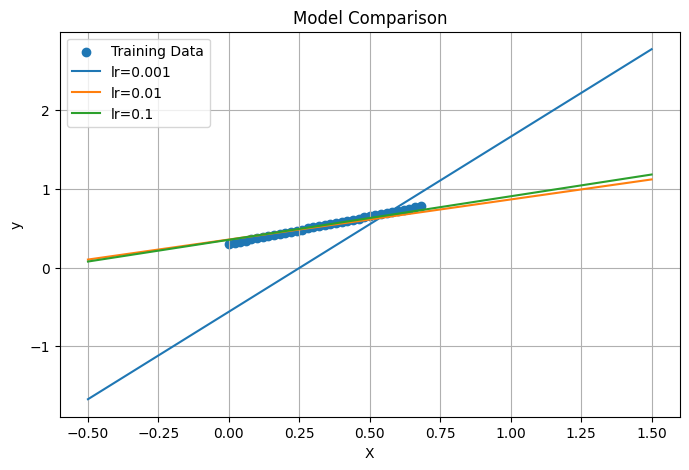

Tip: Plot multiple learned lines on one graph


In [13]:
# Exercise 3: Model comparison
print("\nExercise 3: Model comparison")
# TODO: Load multiple saved models
learning_rates = [0.001, 0.01, 0.1]
loaded_models = {}

for lr in learning_rates:
    filename = f"model_lr{lr}.pth"
    checkpoint = torch.load(filename, weights_only=False)

    model = LinearRegressionModel()
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    loaded_models[lr] = model

    print(f"Loaded model with lr={lr}")

# TODO: Compare their predictions
X_plot = torch.linspace(-0.5, 1.5, 100).unsqueeze(1)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot training data
plt.scatter(X_train.numpy(), y_train.numpy(), label="Training Data")

# Plot each model's prediction
for lr, model in loaded_models.items():
    with torch.no_grad():
        y_plot = model(X_plot)

    plt.plot(X_plot.numpy(), y_plot.numpy(), label=f"lr={lr}")

plt.legend()
plt.title("Model Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# TODO: Visualize all on same plot
print("Tip: Plot multiple learned lines on one graph")


Exercise 4: Save training history
Model and training history saved!


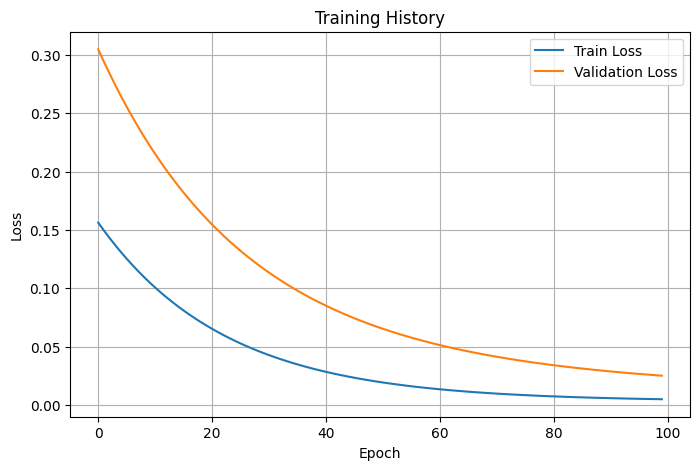

Training history loaded and plotted successfully!


In [15]:
# ============================================
# Exercise 4: Save training history
# ============================================

print("\nExercise 4: Save training history")

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Reinitialize model
model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

epochs = 100
train_losses = []
val_losses = []

# =====================
# Training Loop
# =====================
for epoch in range(epochs):

    # ---- Training ----
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # ---- Validation ----
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    val_losses.append(val_loss.item())

# =====================
# Save checkpoint with history
# =====================
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
}, "model_with_history.pth")

print("Model and training history saved!")

# =====================
# Load and plot training history
# =====================
checkpoint = torch.load("model_with_history.pth", weights_only=False)

train_losses_loaded = checkpoint['train_losses']
val_losses_loaded = checkpoint['val_losses']

plt.figure(figsize=(8,5))
plt.plot(train_losses_loaded, label="Train Loss")
plt.plot(val_losses_loaded, label="Validation Loss")
plt.legend()
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print("Training history loaded and plotted successfully!")



Exercise 5: Resume training
Resuming from epoch 100
Epoch 100: Train Loss = 0.0047, Val Loss = 0.0247
Epoch 110: Train Loss = 0.0041, Val Loss = 0.0217
Epoch 120: Train Loss = 0.0037, Val Loss = 0.0194
Epoch 130: Train Loss = 0.0034, Val Loss = 0.0176
Epoch 140: Train Loss = 0.0032, Val Loss = 0.0162

Training resumed successfully!


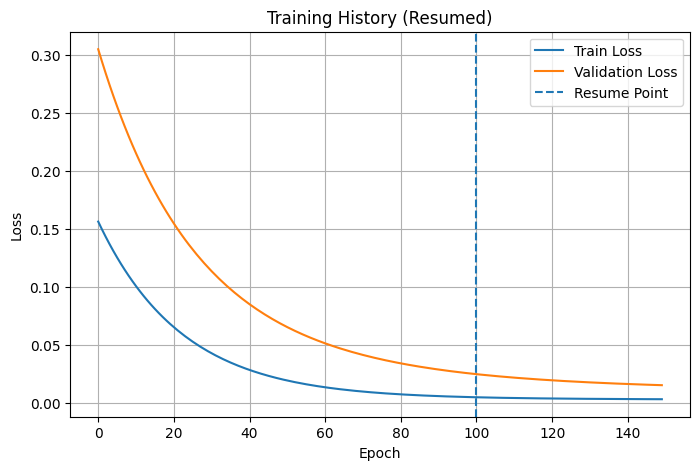


Exercise 4 Complete!
Remember: Visualize, visualize, visualize!
Tip: Use checkpoint['epoch'] as starting point


In [17]:
# ============================================
# Exercise 5: Resume training
# ============================================

print("\nExercise 5: Resume training")

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

checkpoint_path = "model_with_history.pth"

# =====================
# Load checkpoint
# =====================
checkpoint = torch.load(checkpoint_path, weights_only=False)

start_epoch = checkpoint['epoch'] + 1
train_losses = checkpoint['train_losses']
val_losses = checkpoint['val_losses']

print(f"Resuming from epoch {start_epoch}")

# =====================
# Restore model
# =====================
model = LinearRegressionModel()
model.load_state_dict(checkpoint['model_state_dict'])

# Restore optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

criterion = nn.MSELoss()

# =====================
# Continue training
# =====================
additional_epochs = 50
total_epochs = start_epoch + additional_epochs

for epoch in range(start_epoch, total_epochs):

    # ---- Training ----
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # ---- Validation ----
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

print("\nTraining resumed successfully!")

# =====================
# Plot full history
# =====================
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.axvline(x=start_epoch, linestyle='--', label="Resume Point")
plt.legend()
plt.title("Training History (Resumed)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print("\n" + "=" * 60)
print("Exercise 4 Complete!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)

print("Tip: Use checkpoint['epoch'] as starting point")

